In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [3]:
zf = zipfile.ZipFile('/data/households.zip')
households = pd.read_csv(zf.open('Haushalte100m.csv'), delimiter=',', encoding="cp1252")

In [5]:
households

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26891E43370,CRS3035RES100mN2689100E4337000,INSGESAMT,0,Einheiten insgesamt,3,0
1,100mN26912E43412,CRS3035RES100mN2691200E4341200,INSGESAMT,0,Einheiten insgesamt,3,0
2,100mN26912E43412,CRS3035RES100mN2691200E4341200,HHTYP_LEB,2,Ehepaare,3,0
3,100mN26917E43411,CRS3035RES100mN2691700E4341100,INSGESAMT,0,Einheiten insgesamt,5,0
4,100mN26917E43411,CRS3035RES100mN2691700E4341100,HHGROESS_KLASS,1,1 Person,3,0
...,...,...,...,...,...,...,...
18806021,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHGROESS_KLASS,2,2 Personen,3,0
18806022,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHTYP_FAM,1,Einpersonenhaushalte (Singlehaushalte),3,0
18806023,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHTYP_FAM,2,Paare ohne Kind(er),3,0
18806024,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHTYP_LEB,1,Einpersonenhaushalte (Singlehaushalte),3,0


In [6]:
#read excel
translations = pd.read_excel('Data_Format_Census.xlsx', sheet_name='Translations')


In [7]:
translations

,Original,Translated
0,Merkmal,NaN
1,Auspraegung_Text,NaN
2,INSGESAMT,TOTAL
3,Einheiten insgesamt,Total
4,FAMTYP_KIND,FAMTYPE_CHILDREN
...,...,...
206,1 Wohnung,1 apartment
207,2 Wohnungen,2 apartments
208,3 - 6 Wohnungen,3 - 6 apartments
209,7 - 12 Wohnungen,7 - 12 apartments


In [8]:
#tansfrom to dictionary with original as key and translation as value
translation_dict = translations.set_index('Original')['Translated'].to_dict()
#translations_dict = dict(zip(translations['Original'], translations['Translated']))

In [9]:
pivot_df = households.pivot(index='Gitter_ID_100m',columns=['Merkmal', 'Auspraegung_Text'], values='Anzahl')

instead of replacing nan with 0, exclude these cells

In [10]:
#rename columns with trtanslation_dict
pivot_df = pivot_df.rename(columns=translation_dict)

In [11]:
pivot_df    

Merkmal          TOTAL HOUSEHOLD_LIFESTYLE HOUSEHOLD_SIZE           \
Auspraegung_Text Total     Married couples       1 person 2 people   
Gitter_ID_100m                                                       
100mN26891E43370   3.0                 NaN            NaN      NaN   
100mN26912E43412   3.0                 3.0            NaN      NaN   
100mN26917E43411   5.0                 3.0            3.0      3.0   
100mN26923E43411   4.0                 NaN            4.0      NaN   
100mN26924E43412   3.0                 NaN            NaN      3.0   
...                ...                 ...            ...      ...   
100mN35475E42201  17.0                 5.0            9.0      7.0   
100mN35476E42198  20.0                 7.0           13.0      7.0   
100mN35476E42199  16.0                 3.0           10.0      3.0   
100mN35476E42200   3.0                 NaN            NaN      NaN   
100mN35476E42201   6.0                 4.0            3.0      3.0   

Merkmal                    HOUSEHOLD_TYPE                           \
Auspraegung_Text Single-person households Couples without children   
Gitter_ID_100m                                                       
100mN26891E43370                      NaN                      NaN   
100mN26912E43412                      NaN                      NaN   
100mN26917E43411                      3.0                      3.0   
100mN26923E43411                      4.0                      NaN   
100mN26924E43412                      NaN                      NaN   
...                                   ...                      ...   
100mN35475E42201                      9.0                      5.0   
100mN35476E42198                     13.0                      7.0   
100mN35476E42199                     10.0                      3.0   
100mN35476E42200                      NaN                      NaN   
100mN35476E42201                      3.0                      3.0   

Merkmal               HOUSEHOLD_LIFESTYLE HOUSEHOLD_TYPE HOUSEHOLD_LIFESTYLE  \
Auspraegung_Text Single-person households Single parents      Single mothers   
Gitter_ID_100m                                                                 
100mN26891E43370                      NaN            NaN                 NaN   
100mN26912E43412                      NaN            NaN                 NaN   
100mN26917E43411                      3.0            NaN                 NaN   
100mN26923E43411                      4.0            NaN                 NaN   
100mN26924E43412                      NaN            3.0                 3.0   
...                                   ...            ...                 ...   
100mN35475E42201                      9.0            3.0                 3.0   
100mN35476E42198                     13.0            NaN                 NaN   
100mN35476E42199                     10.0            NaN                 NaN   
100mN35476E42200                      NaN            NaN                 NaN   
100mN35476E42201                      3.0            NaN                 NaN   

Merkmal                 HOUSEHOLD_TYPE HOUSEHOLD_SIZE                    \
Auspraegung_Text Couples with children       4 people 5 people 3 people   
Gitter_ID_100m                                                            
100mN26891E43370                   NaN            NaN      NaN      NaN   
100mN26912E43412                   NaN            NaN      NaN      NaN   
100mN26917E43411                   NaN            NaN      NaN      NaN   
100mN26923E43411                   NaN            NaN      NaN      NaN   
100mN26924E43412                   NaN            NaN      NaN      NaN   
...                                ...            ...      ...      ...   
100mN35475E42201                   NaN            NaN      NaN      NaN   
100mN35476E42198                   NaN            NaN      NaN      NaN   
100mN35476E42199                   NaN            NaN      3.0      NaN   
100mN35476E42200 

In [12]:
#print unique columns
print(pivot_df.columns.get_level_values(0).unique())

Index(['TOTAL', 'HOUSEHOLD_LIFESTYLE', 'HOUSEHOLD_SIZE', 'HOUSEHOLD_TYPE'], dtype='object', name='Merkmal')


In [13]:
total = pivot_df['TOTAL']['Total'].sum()

In [22]:
pivot_df[['TOTAL','HOUSEHOLD_LIFESTYLE']]

Merkmal          TOTAL HOUSEHOLD_LIFESTYLE                           \
Auspraegung_Text Total     Married couples Single-person households   
Gitter_ID_100m                                                        
100mN26891E43370   3.0                 NaN                      NaN   
100mN26912E43412   3.0                 3.0                      NaN   
100mN26917E43411   5.0                 3.0                      3.0   
100mN26923E43411   4.0                 NaN                      4.0   
100mN26924E43412   3.0                 NaN                      NaN   
...                ...                 ...                      ...   
100mN35475E42201  17.0                 5.0                      9.0   
100mN35476E42198  20.0                 7.0                     13.0   
100mN35476E42199  16.0                 3.0                     10.0   
100mN35476E42200   3.0                 NaN                      NaN   
100mN35476E42201   6.0                 4.0                      3.0   

Merkmal                          \
Auspraegung_Text Single mothers   
Gitter_ID_100m                    
100mN26891E43370            NaN   
100mN26912E43412            NaN   
100mN26917E43411            NaN   
100mN26923E43411            NaN   
100mN26924E43412            3.0   
...                         ...   
100mN35475E42201            3.0   
100mN35476E42198            NaN   
100mN35476E42199            NaN   
100mN35476E42200            NaN   
100mN35476E42201            NaN   

Merkmal                                                          \
Auspraegung_Text Multi-person households without nuclear family   
Gitter_ID_100m                                                    
100mN26891E43370                                            NaN   
100mN26912E43412                                            NaN   
100mN26917E43411                                            NaN   
100mN26923E43411                                            NaN   
100mN26924E43412                                            NaN   
...                                                         ...   
100mN35475E42201                                            NaN   
100mN35476E42198                                            NaN   
100mN35476E42199                                            3.0   
100mN35476E42200                                            NaN   
100mN35476E42201                                            NaN   

Merkmal                                                   \
Auspraegung_Text Non-marital cohabitation Single fathers   
Gitter_ID_100m                                             
100mN26891E43370                      NaN            NaN   
100mN26912E43412                      NaN            NaN   
100mN26917E43411                      NaN            NaN   
100mN26923E43411                      NaN            NaN   
100mN26924E43412                      NaN            NaN   
...                                   ...            ...   
100mN35475E42201                      NaN            NaN   
100mN35476E42198                      NaN            NaN   
100mN35476E42199                      NaN            NaN   
100mN35476E42200                      NaN            NaN   
100mN35476E42201                      NaN            NaN   

Merkmal                                         
Auspraegung_Text Registered civil partnerships  
Gitter_ID_100m                                  
100mN26891E43370                           NaN  
100mN26912E43412                           NaN  
100mN26917E43411                           NaN  
100mN26923E43411                           NaN  
100mN26924E43412                           NaN  
...                                        ...  
100mN35475E42201                           NaN  
100mN35476E42198                           NaN  
100mN35476E42199                           NaN  
100mN35476E42200                           NaN  
100mN35476E42201                           NaN  

[2665595 rows x 8 columns]

In [23]:
pivot_df['HOUSEHOLD_LIFESTYLE_DC'] = pivot_df['HOUSEHOLD_LIFESTYLE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['HOUSEHOLD_SIZE_DC'] = pivot_df['HOUSEHOLD_SIZE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['HOUSEHOLD_TYPE_DC'] = pivot_df['HOUSEHOLD_TYPE'].sum(axis=1) / pivot_df['TOTAL']['Total']




In [24]:
pivot_df[['TOTAL', 'HOUSEHOLD_LIFESTYLE', 'HOUSEHOLD_LIFESTYLE_DC']]

Merkmal          TOTAL HOUSEHOLD_LIFESTYLE                           \
Auspraegung_Text Total     Married couples Single-person households   
Gitter_ID_100m                                                        
100mN26891E43370   3.0                 NaN                      NaN   
100mN26912E43412   3.0                 3.0                      NaN   
100mN26917E43411   5.0                 3.0                      3.0   
100mN26923E43411   4.0                 NaN                      4.0   
100mN26924E43412   3.0                 NaN                      NaN   
...                ...                 ...                      ...   
100mN35475E42201  17.0                 5.0                      9.0   
100mN35476E42198  20.0                 7.0                     13.0   
100mN35476E42199  16.0                 3.0                     10.0   
100mN35476E42200   3.0                 NaN                      NaN   
100mN35476E42201   6.0                 4.0                      3.0   

Merkmal                          \
Auspraegung_Text Single mothers   
Gitter_ID_100m                    
100mN26891E43370            NaN   
100mN26912E43412            NaN   
100mN26917E43411            NaN   
100mN26923E43411            NaN   
100mN26924E43412            3.0   
...                         ...   
100mN35475E42201            3.0   
100mN35476E42198            NaN   
100mN35476E42199            NaN   
100mN35476E42200            NaN   
100mN35476E42201            NaN   

Merkmal                                                          \
Auspraegung_Text Multi-person households without nuclear family   
Gitter_ID_100m                                                    
100mN26891E43370                                            NaN   
100mN26912E43412                                            NaN   
100mN26917E43411                                            NaN   
100mN26923E43411                                            NaN   
100mN26924E43412                                            NaN   
...                                                         ...   
100mN35475E42201                                            NaN   
100mN35476E42198                                            NaN   
100mN35476E42199                                            3.0   
100mN35476E42200                                            NaN   
100mN35476E42201                                            NaN   

Merkmal                                                   \
Auspraegung_Text Non-marital cohabitation Single fathers   
Gitter_ID_100m                                             
100mN26891E43370                      NaN            NaN   
100mN26912E43412                      NaN            NaN   
100mN26917E43411                      NaN            NaN   
100mN26923E43411                      NaN            NaN   
100mN26924E43412                      NaN            NaN   
...                                   ...            ...   
100mN35475E42201                      NaN            NaN   
100mN35476E42198                      NaN            NaN   
100mN35476E42199                      NaN            NaN   
100mN35476E42200                      NaN            NaN   
100mN35476E42201                      NaN            NaN   

Merkmal                                        HOUSEHOLD_LIFESTYLE_DC  
Auspraegung_Text Registered civil partnerships                         
Gitter_ID_100m                                                         
100mN26891E43370                           NaN               0.000000  
100mN26912E43412                           NaN               1.000000  
100mN26917E43411                           NaN               1.200000  
100mN26923E43411                           NaN               1.000000  
100mN26924E43412                           NaN               1.000000  
...                                        ...                    ...  
100mN35475E42201                           NaN               1.000000  
100mN35476E421

In [28]:
pivot_df[['TOTAL', 'HOUSEHOLD_SIZE', 'HOUSEHOLD_SIZE_DC']]

Merkmal          TOTAL HOUSEHOLD_SIZE                                      \
Auspraegung_Text Total       1 person 2 people 4 people 5 people 3 people   
Gitter_ID_100m                                                              
100mN26891E43370   3.0            NaN      NaN      NaN      NaN      NaN   
100mN26912E43412   3.0            NaN      NaN      NaN      NaN      NaN   
100mN26917E43411   5.0            3.0      3.0      NaN      NaN      NaN   
100mN26923E43411   4.0            4.0      NaN      NaN      NaN      NaN   
100mN26924E43412   3.0            NaN      3.0      NaN      NaN      NaN   
...                ...            ...      ...      ...      ...      ...   
100mN35475E42201  17.0            9.0      7.0      NaN      NaN      NaN   
100mN35476E42198  20.0           13.0      7.0      NaN      NaN      NaN   
100mN35476E42199  16.0           10.0      3.0      NaN      3.0      NaN   
100mN35476E42200   3.0            NaN      NaN      NaN      NaN      NaN   
100mN35476E42201   6.0            3.0      3.0      NaN      NaN      NaN   

Merkmal                           HOUSEHOLD_SIZE_DC  
Auspraegung_Text 6 or more people                    
Gitter_ID_100m                                       
100mN26891E43370              NaN          0.000000  
100mN26912E43412              NaN          0.000000  
100mN26917E43411              NaN          1.200000  
100mN26923E43411              NaN          1.000000  
100mN26924E43412              NaN          1.000000  
...                           ...               ...  
100mN35475E42201              NaN          0.941176  
100mN35476E42198              NaN          1.000000  
100mN35476E42199              NaN          1.000000  
100mN35476E42200              NaN          0.000000  
100mN35476E42201              NaN          1.000000  

[2665595 rows x 8 columns]

In [29]:
pivot_df[['TOTAL', 'HOUSEHOLD_TYPE', 'HOUSEHOLD_TYPE_DC']]

Merkmal          TOTAL           HOUSEHOLD_TYPE                           \
Auspraegung_Text Total Single-person households Couples without children   
Gitter_ID_100m                                                             
100mN26891E43370   3.0                      NaN                      NaN   
100mN26912E43412   3.0                      NaN                      NaN   
100mN26917E43411   5.0                      3.0                      3.0   
100mN26923E43411   4.0                      4.0                      NaN   
100mN26924E43412   3.0                      NaN                      NaN   
...                ...                      ...                      ...   
100mN35475E42201  17.0                      9.0                      5.0   
100mN35476E42198  20.0                     13.0                      7.0   
100mN35476E42199  16.0                     10.0                      3.0   
100mN35476E42200   3.0                      NaN                      NaN   
100mN35476E42201   6.0                      3.0                      3.0   

Merkmal                                                \
Auspraegung_Text Single parents Couples with children   
Gitter_ID_100m                                          
100mN26891E43370            NaN                   NaN   
100mN26912E43412            NaN                   NaN   
100mN26917E43411            NaN                   NaN   
100mN26923E43411            NaN                   NaN   
100mN26924E43412            3.0                   NaN   
...                         ...                   ...   
100mN35475E42201            3.0                   NaN   
100mN35476E42198            NaN                   NaN   
100mN35476E42199            NaN                   NaN   
100mN35476E42200            NaN                   NaN   
100mN35476E42201            NaN                   NaN   

Merkmal                                                          \
Auspraegung_Text Multi-person households without nuclear family   
Gitter_ID_100m                                                    
100mN26891E43370                                            NaN   
100mN26912E43412                                            NaN   
100mN26917E43411                                            NaN   
100mN26923E43411                                            NaN   
100mN26924E43412                                            NaN   
...                                                         ...   
100mN35475E42201                                            NaN   
100mN35476E42198                                            NaN   
100mN35476E42199                                            3.0   
100mN35476E42200                                            NaN   
100mN35476E42201                                            NaN   

Merkmal          HOUSEHOLD_TYPE_DC  
Auspraegung_Text                    
Gitter_ID_100m                      
100mN26891E43370               0.0  
100mN26912E43412               0.0  
100mN26917E43411               1.2  
100mN26923E43411               1.0  
100mN26924E43412               1.0  
...                            ...  
100mN35475E42201               1.0  
100mN35476E42198               1.0  
100mN35476E42199               1.0  
100mN35476E42200               0.0  
100mN35476E42201               1.0  

[2665595 rows x 7 columns]

In [30]:
lifestyle = pivot_df['HOUSEHOLD_LIFESTYLE_DC'].sum().sum()
size = pivot_df['HOUSEHOLD_SIZE_DC'].sum().sum()
type = pivot_df['HOUSEHOLD_TYPE_DC'].sum().sum()



In [31]:
print('life:', lifestyle/total*100)
print('size:', size/total*100)
print('type:', type/total*100)


life: 6.037497297990889
size: 5.64056876084915
type: 5.958434955169651


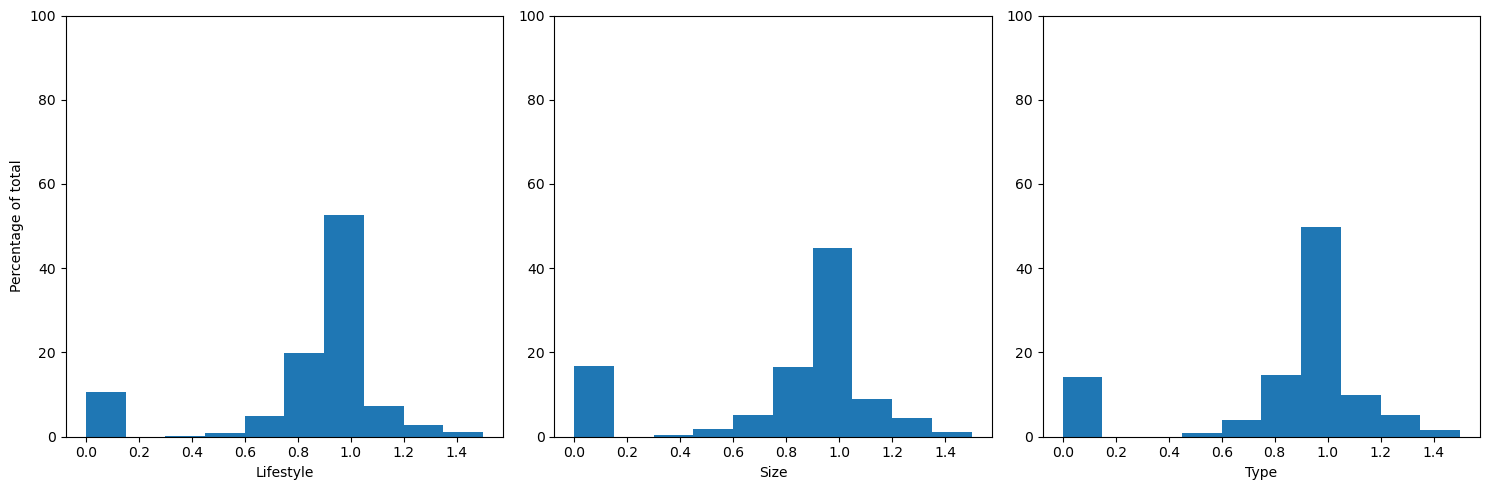

In [34]:
data1 = pivot_df['HOUSEHOLD_LIFESTYLE_DC']
data2 = pivot_df['HOUSEHOLD_SIZE_DC']
data3 = pivot_df['HOUSEHOLD_TYPE_DC']


counts1, bins1 = np.histogram(data1)
counts1 = counts1/counts1.sum()*100

counts2, bins2 = np.histogram(data2)
counts2 = counts2/counts2.sum()*100

counts3, bins3 = np.histogram(data3)
counts3 = counts3/counts3.sum()*100



plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(bins1[:-1], bins1, weights=counts1)
plt.xlabel('Lifestyle')
plt.ylabel('Percentage of total')
plt.ylim(0,100)
plt.subplot(1,3,2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.xlabel('Size')
plt.ylim(0,100)
plt.subplot(1,3,3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.xlabel('Type')
plt.ylim(0,100)




plt.tight_layout()



plt.show()



In [35]:
pivot_df.to_csv('Households_100m_pivot.csv', sep=',', encoding="cp1252")